Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

In [4]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['price'])
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,-0.401652,0.370669,-0.609431,-0.272599,-0.783454,-0.063589,-1.858925,0.301364,-0.752922,-1.100176,0.066796,0.441052,-0.849883
278,-0.411233,1.229060,-0.689681,-0.272599,-0.930305,0.281179,-1.297068,0.164125,-0.637962,-0.916058,-0.395567,0.441052,-0.765778
30,-0.288921,-0.487722,-0.437258,-0.272599,-0.144217,-0.814384,0.907687,0.208191,-0.637962,-0.601276,1.176466,0.038331,1.394300
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
421,0.396724,-0.487722,1.015999,-0.272599,1.410682,-0.396959,0.950360,-0.912919,1.661245,1.530926,0.806576,-0.402327,0.427101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.400594,-0.487722,-0.375976,-0.272599,-0.299707,-0.639151,0.829454,-0.753005,-0.523001,-0.143951,1.130230,0.427566,0.842015
270,-0.385703,0.370669,-0.609431,-0.272599,-0.783454,-0.610658,-0.941463,0.301364,-0.752922,-1.100176,0.066796,0.350596,0.048631
348,-0.418771,2.945843,-1.331682,-0.272599,-1.033965,0.499151,-1.382414,2.162434,-0.637962,-0.761637,-0.672984,0.375704,-0.933987
435,0.878254,-0.487722,1.015999,-0.272599,1.600725,0.490603,0.925467,-0.794029,1.661245,1.530926,0.806576,-2.706267,1.488216


In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42, n_jobs=-1)

X_train_tsne = tsne.fit_transform(X_train)

/home/alex/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


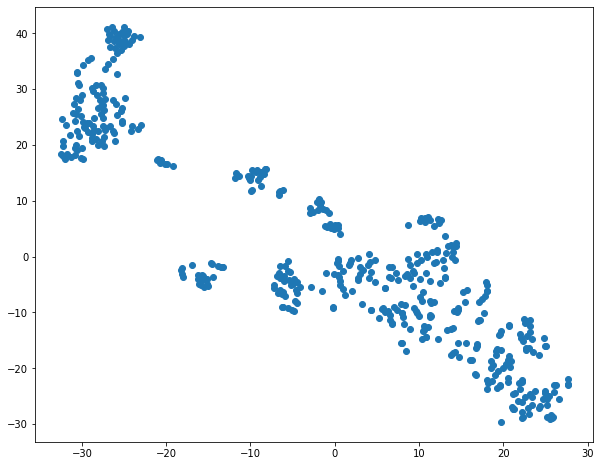

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])